In [1]:
import sys
sys.path.append("../")

import numpy as np
import matplotlib.pyplot as plt
import math as m #aggiunto io
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",})

# Import pyACC logger
from pyACC.helpers import Logger

# Set the logger
print = Logger("IMF computation")

# Import your integration methods
from pyACC.Calculus import trapezi

**Initial Mass function**

In this exercise we will play with the Initial Mass function (IMF).

The IMF is a key concept in stellar populations. It the defines how star mass is distributed in a single formation event of a stellar population (SSP).

This quantity is at the core of many astrophysical studies, from star clusters (open/globular) to galaxies, and it's fundamental to explain observational properties of the object in study.

You will find different assumptions for this distribution in literature. The more traditional is a power-law (Salpeter 1955):

$$
\xi (M) = \xi _0 M^{-\alpha}
$$

where M is the mass in solar masses unit, 
 is a normalisation constant and 
 is power-law exponent A common assumption is 
. Other, more recent definitions for the IMF are Kroupa (2002) (double power-law) and Chabrier (2003)

Starting from the IMF, we will compute some key quantities of the stellar population.

In [2]:
# Let's define the python function for the IMF
def get_IMF(M, alpha, xi_0):
    """
    Generic function for the IMF

    Parameters
    ----------

    M : float
        Mass of the star
    alpha : float
        Power of the IMF
    xi_0 : float    
        Normalization factor
    
    Returns
    -------
    IMF : float
        The value of the IMF at mass M
    """

    # Implement the Salpeter IMF
    xi = xi_0 * M**(-alpha)

    return xi

Text(0, 0.5, '$\\xi(M)$')

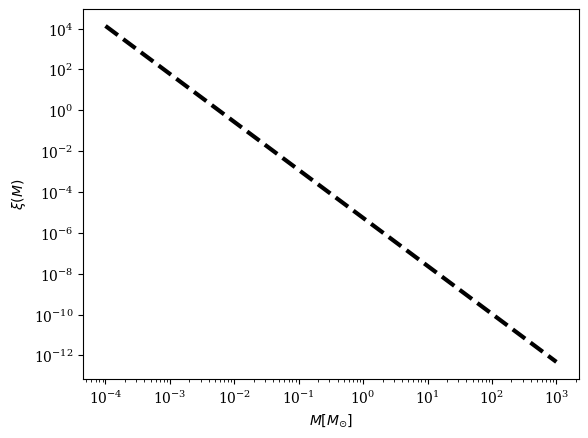

In [3]:
# Minimum and maximum mass size in solar masses unit
mass_min = 0.0001
mass_max = 1000

# Power of the IMF
alpha = 2.35
# Normalisation of the IMF
xi_0 = (1-alpha) / (mass_max**(1-alpha) - mass_min**(1-alpha))

# Create the mass vector
mass = np.logspace(np.log10(mass_min), np.log10(mass_max), 100)

# Plot in log scale
plt.loglog(mass, get_IMF(mass, alpha, xi_0), lw=3, color="k", ls="--")
plt.xlabel(r"$M  [M_{\odot}]$")
plt.ylabel(r"$\xi(M)$")


**Total number of stars**

You can obtain the total number of stars by integrating the IMF over the mass range. The total number of stars is given by

$$
N = \int_{N_{min}}^{N_{max}} \xi (M) \,dM
$$


Try to perform this integration.

In [4]:
# Get the total number of stars

# Create the integration object
# Call your integration method to obtain the number of stars
def funz(x): #definisco funzione da integrare
    return xi_0*x**(-alpha)
N = trapezi(funz, mass_min, mass_max, 1000)

# Print the result
print(f"The total number of stars is {N:.0f}")

2024-03-06 16:24:54.138307 :: IMF computation  :: The total number of stars is 20250


**Average star mass**

The average star mass can be compute quit strightforwardly:

$$
\hat{M} = \frac{\int_{N_{min}}^{N_{max}} M \xi (M) \,dM}{\int_{N_{min}}^{N_{max}} \xi (M) \,dM}
$$

After obtaining this number, what can we conclude?

In [5]:
# Compute the average star mass
def funz2(x): #definisco funzione da integrare
    return xi_0*x**(-alpha+1)

num = trapezi(funz2, mass_min, mass_max, 1000)
den = trapezi(funz, mass_min, mass_max, 1000)

M_hat = num / den

print(f"The average star mass is: {M_hat:.2e} solar masses")

2024-03-06 16:24:54.150058 :: IMF computation  :: The average star mass is: 1.00e-04 solar masses


In [6]:
def get_star_luminosity(M):
    """
    Get the star luminosity using the mass-luminosity
    relation

    Parameters
    ----------
    M : float
        Mass of the star
    
    Returns
    -------
    L : float
        Luminosity of the star
    """

    if M < 0.43:
        L = 0.23 * M**2.3
    elif 0.43 < M < 2:
        L = M**4
    elif 2 < M < 20:
        L = 1.5 * M**3.5
    elif M > 20:
        L = 3200 * M
    
    return L

In [7]:
# Compute average luminosity
L_hat = get_star_luminosity(M_hat)

print(f"The average star luminosity is: {L_hat:.2e} solar luminosity")

2024-03-06 16:24:54.171534 :: IMF computation  :: The average star luminosity is: 1.45e-10 solar luminosity


Text(0, 0.5, '$L(M) [L_{\\odot}]$')

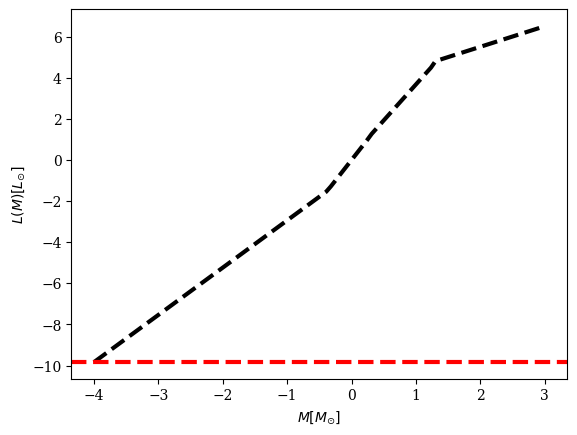

In [8]:
# Plot luminosity
plt.plot(np.log10(mass), np.log10([get_star_luminosity(m) for m in mass]), lw=3, color="k", ls="--")
plt.axhline(np.log10(L_hat), color="r", lw=3, ls="--", label="Average luminosity")
plt.xlabel(r"$M  [M_{\odot}]$")
plt.ylabel(r"$L(M) [L_{\odot}]$")